<center>
    
#  **NoteBook: Lista 2 - Simuladores Cuánticos**
    
    Carlos Andrés Rodallega Millán - 2071142
    Institución: Universidad del Valle
    Correo: rodallega.carlos@correounivalle.edu.co  

# <center> Indice
1. [Solución Punto 2](#1)
    1. [Aproximación de Suzuki-Trotter](#1.1)
    2. [Aproximación Perturbativa](#1.2)
    3. [Visualización de Ambas Soluciones.](#1.3)
2. [Solución Punto 3](#2)
    1. [Solución Suzuki Trotter - Hiperbolas](#2.1)
    2. [Solución Suzuki Trotter - Energía](#2.2)
    3. [Solución Perturbativa - Hiperbolas](#2.3)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#Si se genera problemas al compilar, comente las siguientes lineas:
plt.style.reload_library()
plt.style.use(['science','notebook'])
from itertools import combinations
print('done')

done


<a id="1"></a>
# 1. Solución Punto 2

Considere el siguiente hamiltoniano
$$
\hat{H}=\hat{\sigma}_z+\Gamma \hat{\sigma}_x:=\left(\begin{array}{cc}
1 & \Gamma \\
\Gamma & -1
\end{array}\right)
$$

Empezando desde el siguiente estado inicial
$$
\psi(t=0)=\left(\begin{array}{l}
1 \\
0
\end{array}\right)
$$


<a id="1.1"></a>
## 1.1- Aproximación de Suzuki-Trotter

Calcule la dinámica del sistema utilizando la aproximación de Suzuki-Trotter
$$
\hat{U}(t+\Delta t ; t) \approx e^{-i \Delta t \hat{\sigma}_z} e^{-i \Delta t \Gamma \hat{\sigma}_x}
$$


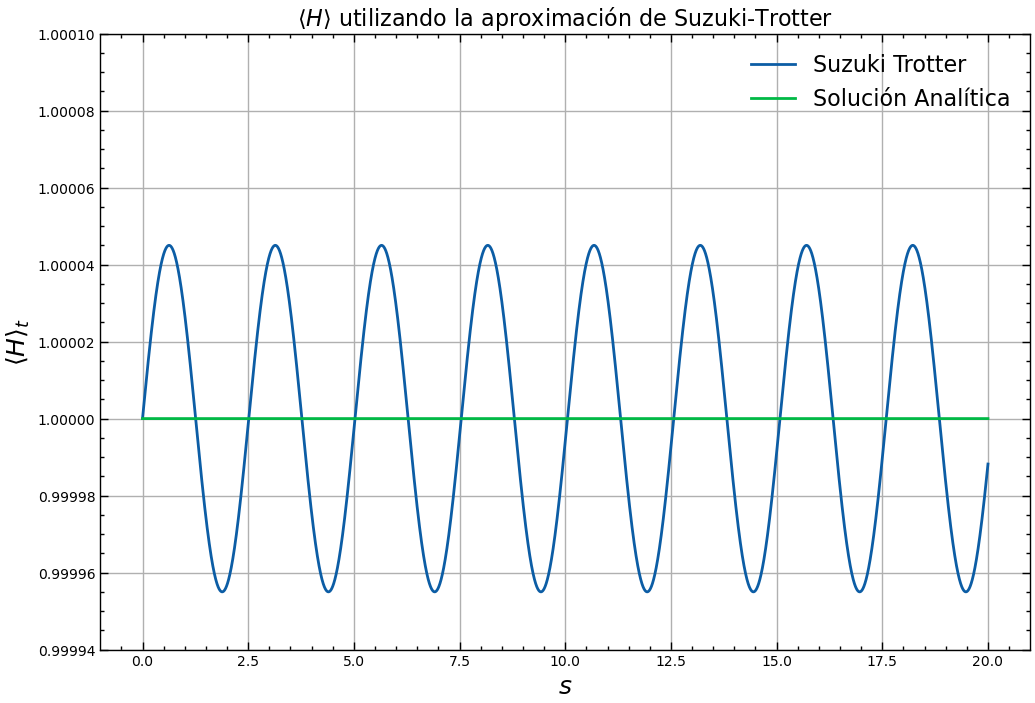

In [2]:
#Definición de variables iniciales.
n = 200000 #número de pasos.
tf = 20
ti = 0
dt = (tf-ti)/n
sigma = 3/4
t = []
E_est_zt = []
E_anal_zt = []


#Estados propios de la matriz pauli Sigma x
pauli_x1 = 1/np.sqrt(2) * np.array([1,1]) #Definimos la representacion del estado sigma_x1 y sigma_x2
pauli_x2 = 1/np.sqrt(2) * np.array([-1,1])

#Estados propios de la matriz pauli Sigma z
pauli_z1 = np.array([1,0])    #Defino el estado inicial phi_0
pauli_z2 = np.array([0,1])    #Defino el estado inicial phi_0


phi_0 = pauli_z1 = np.array([1,0]) 
#Ciclo de Iteración
for j in range (0, n):
    ti = ti+dt
    t.append(ti)
    a = np.dot(pauli_x1, phi_0)
    b = np.dot(pauli_x2, phi_0)
    E_1 = complex(np.cos(dt * (sigma + 1)), -1 * np.sin(dt*(sigma + 1)))
    E_2 = complex(np.cos(dt * (sigma - 1)), 1 * np.sin(dt*(sigma - 1))) 
    
    E = (a * E_1) - (b * E_2)
    
    
    F_1 = complex(np.cos(dt * (sigma - 1)), -1 * np.sin(dt*(sigma - 1)))
    F_2 = complex(np.cos(dt * (sigma + 1)), 1 * np.sin(dt*(sigma + 1)))
    
    F = (a * F_1) + (b * F_2)
    
    phi_0 = 1/np.sqrt(2) * (E * pauli_z1 + F * pauli_z2)
    
    Energy = 1/2 * (E.conjugate()*(E + F*sigma) + F.conjugate()*(E*sigma - F))  
    E_real = Energy.real
    E_anal_zt.append(1)
    E_est_zt.append(E_real)
    
#Grafica
plt.figure(figsize=(12, 8))
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.plot(t,E_est_zt, label ='Suzuki Trotter')
plt.plot(t,E_anal_zt, label ='Solución Analítica')
plt.ylim(0.99994,1.0001)
plt.xticks(fontsize=10)  # Tamaño de fuente para los ticks del eje x
plt.yticks(fontsize=10)
plt.xlabel(r'$s$',fontsize=18)
plt.ylabel(r'$\langle H \rangle_t $',fontsize=18)
plt.title(r'$\langle H \rangle $ utilizando la aproximación de Suzuki-Trotter')
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig("Grafica_1.png", dpi=500)
plt.show()

<a id="1.2"></a>
## 1.2- Aproximación Perturbativa

Ahora, calcule la evolución de la dinamica del sistema en el tiempo utilizando la aproximación perturbativa

$$
\hat{U}(t+\Delta t ; t) \approx \hat{I}-i \Delta t \hat{H}=\hat{I}-i \Delta t\left(\hat{\sigma}_z+\Gamma \hat{\sigma}_x\right)
$$

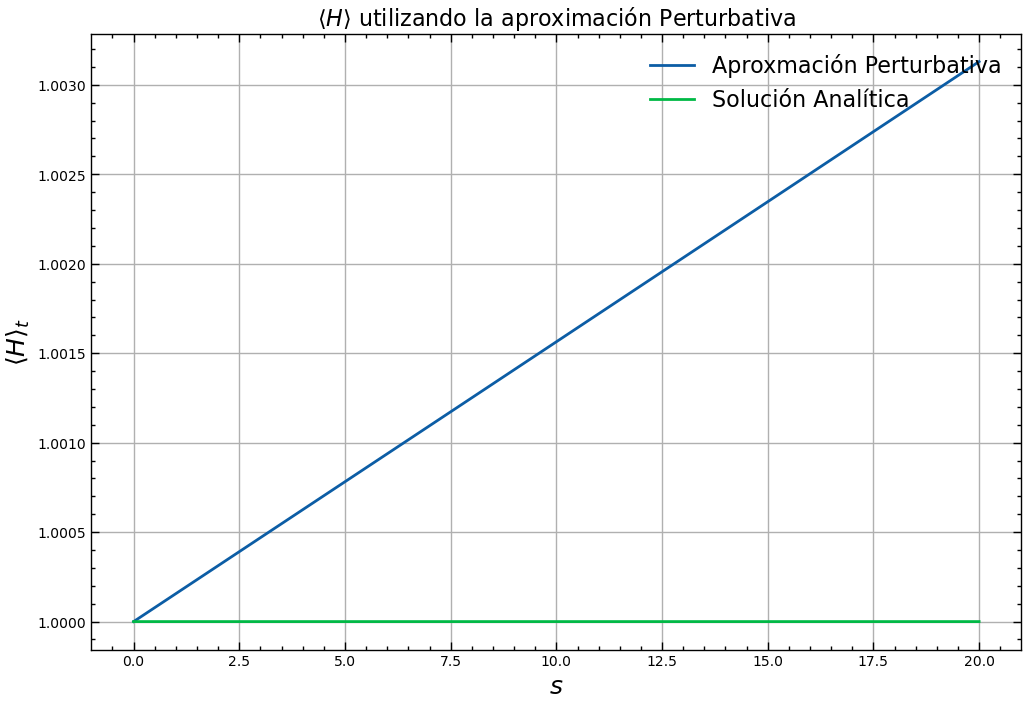

In [3]:
#Definición de variables iniciales.
n = 200000 #número de pasos.
tf = 20
ti = 0
dt = (tf-ti)/n
sigma = 3/4
t = []
E_est_ty = []
E_anal_ty = []


#Estados propios de la matriz pauli Sigma x
pauli_x1 = 1/np.sqrt(2) * np.array([1,1]) #Definimos la representacion del estado sigma_x1 y sigma_x2
pauli_x2 = 1/np.sqrt(2) * np.array([-1,1])

#Estados propios de la matriz pauli Sigma z
pauli_z1 = np.array([1,0])    #Defino el estado inicial phi_0
pauli_z2 = np.array([0,1])    #Defino el estado inicial phi_0


phi_0 = pauli_z1
#Ciclo de Iteración
for j in range (0, n):
    ti = ti+dt
    t.append(ti)
    a = np.dot(pauli_z1, phi_0)
    b = np.dot(pauli_z2, phi_0)
    
    E_1 = a
    E_2 = a * dt * complex(0,1)
    E_3 = b * dt * complex(0,1) * sigma
    
    E = E_1 - E_2 - E_3
    
    
    F_1 = b 
    F_2 = b * dt * complex(0,1)    
    F_3 = a * dt * complex(0,1) * sigma
    
    F = F_1 + F_2 - F_3
    
    phi_0 =  (E * pauli_z1 + F * pauli_z2)
    
    Energy = (E.conjugate()*(E + F*sigma) + F.conjugate()*(E*sigma - F))  
    
    E_real = Energy.real
    E_anal_ty.append(1)
    E_est_ty.append(E_real)


plt.figure(figsize=(12, 8))
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.plot(t,E_est_ty, label ='Aproxmación Perturbativa')
plt.plot(t,E_anal_ty, label ='Solución Analítica')
#plt.ylim(0.99994,1.0001)
plt.xticks(fontsize=10)  # Tamaño de fuente para los ticks del eje x
plt.yticks(fontsize=10)
plt.xlabel(r'$s$',fontsize=18)
plt.ylabel(r'$\langle H \rangle_t $',fontsize=18)
plt.title(r'$\langle H \rangle $ utilizando la aproximación Perturbativa')
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig("Grafica_2.png", dpi=500)
plt.show()


<a id="1.3"></a>
## 1.3- Visualización de Ambas Soluciones.

A continuación simplemente se grafican ambas soluciones.

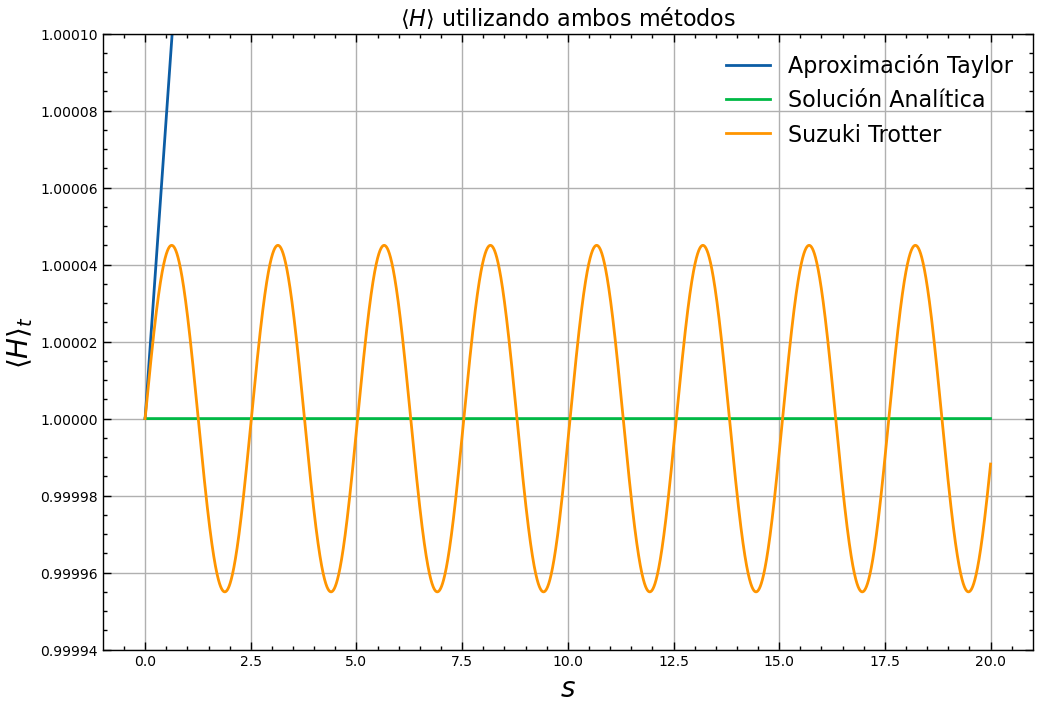

In [4]:
#Grafica
plt.figure(figsize=(12, 8))
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.plot(t,E_est_ty, label ='Aproximación Taylor')
plt.plot(t,E_anal_ty, label ='Solución Analítica')
plt.plot(t,E_est_zt, label ='Suzuki Trotter')
plt.ylim(0.99994,1.0001)
plt.xticks(fontsize=10)  # Tamaño de fuente para los ticks del eje x
plt.yticks(fontsize=10)
plt.xlabel(r'$s$',fontsize=20)
plt.ylabel(r'$\langle H \rangle_t $',fontsize=20)
plt.title(r'$\langle H \rangle $ utilizando ambos métodos')
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig("Grafica_3.png", dpi=500)
plt.show()


<a id="2"></a>
# 2. Solución Punto 3

Considere el sistema dado por la siguientes ecuaciones
$$
K(\vec{p})=\frac{1}{2}\left(p_1^2+p_2^2\right)
$$

$$
V(\vec{q})=\frac{1}{2} q_1^2 q_2^2
$$

A continuación se presentan las gráficas del movimiento del sistema $(q_1, q_2)$ con las condiciones dadas.

<a id="2.1"></a>
## 2.1 - Solución Suzuki Trotter - Hiperbolas.

Realizamos la siguiente aproximación en el sitema:
$$
\hat{u}(t+\Delta t ; t) \approx e^{\Delta t(K+v)}=e^{\Delta t K} \cdot e^{\Delta t v}
$$

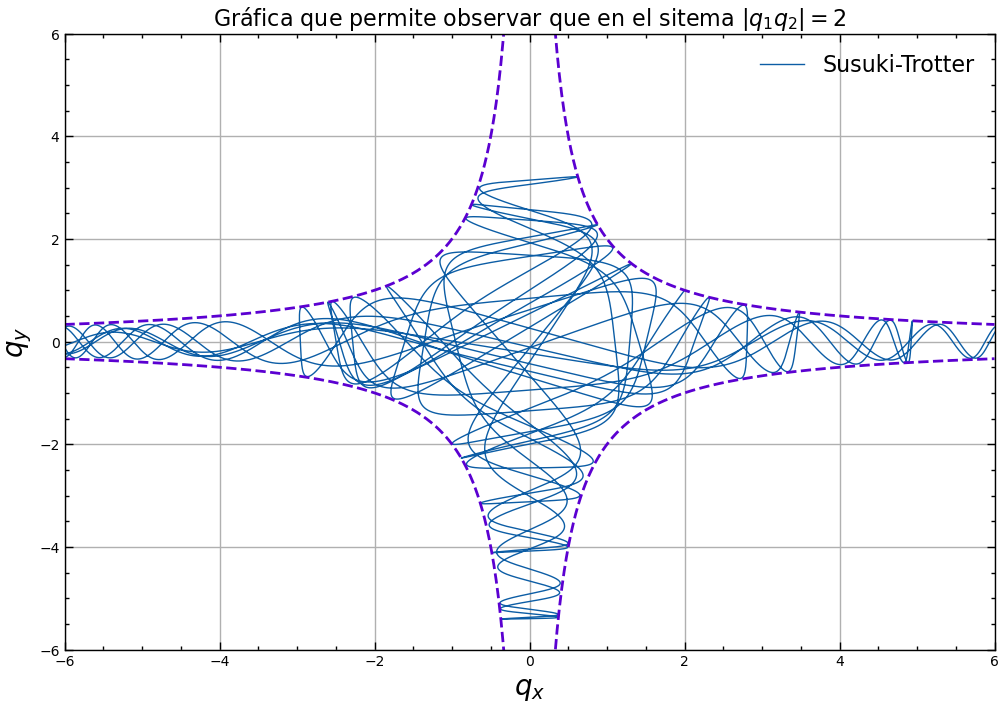

In [8]:
#Parametros simulación
t_i=0
t_f=200
dt=0.00001
pasos_0 = (t_f-t_i)/dt
pasos = int(pasos_0)


#Inicialización de variables.

px = []
py = []
qx = []
qy = []
t = []



#Condiciones Inciales.

p_x_0 = 0
p_y_0 = 0

q_x_0 = 2
q_y_0 = 1

#Agregamos las condiciones iniciales a la lista inicializada.
px.append(p_x_0)
py.append(p_y_0)
qx.append(q_x_0)
qy.append(q_y_0)
t.append(t_i)

#Creamos vectores p y x generales (se iteraran.)
p = np.array([p_x_0,p_y_0])
q = np.array([q_x_0,q_y_0])

#Suzuki-Trotter.
for i in range(0,pasos):
    #Generamos la lista de tiempo.
    t_i = t_i + dt
    t.append(t_i)
    #Iteramos
    p1 = p[0] - dt * q[0]*q[1]**2
    p2 = p[1] - dt * q[1]*q[0]**2
    q1 = dt*p[0] - dt**2 * q[0] * q[1]**2 + q[0]
    q2 = dt*p[1] - dt**2 * q[1] * q[0]**2 + q[1]
    #Guardamos los valores
    px.append(p1)
    py.append(p2)
    qx.append(q1)
    qy.append(q2)
    #Redefinimos los nuevos valores
    q = np.array([q1,q2])
    p = np.array([p1,p2])

#Generar Hiperbolas:
x1 = np.linspace(-6, -0.01, 400)
x2 = np.linspace(0.01, 6, 400)
y1 = 2 / x1
y2 = -2 / x1
y3 = 2 / x2
y4 = -2 / x2

    
    
#Graficas:
plt.figure(figsize=(12, 8))
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.plot(qx,qy,linewidth=1, label="Susuki-Trotter")
plt.plot(x1, y1, linestyle='--', color='#5b00d1')
plt.plot(x1, y2, linestyle='--', color='#5b00d1')
plt.plot(x2, -y3, linestyle='--', color='#5b00d1')
plt.plot(x2, -y4, linestyle='--', color='#5b00d1')
plt.ylim(-6, 6)
plt.yticks(np.arange(-6, 6.5, 2))
plt.xlim(-6, 6)
plt.xticks(np.arange(-6, 6.5, 2))
plt.xticks(fontsize=10)  # Tamaño de fuente para los ticks del eje x
plt.yticks(fontsize=10)
plt.xlabel(r'$q_x$',fontsize=20)
plt.ylabel(r'$q_y$',fontsize=20)
plt.title(r'Gráfica que permite observar que en el sitema $|q_1 q_2| = 2$')
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig("Grafica_4.png", dpi=500)
plt.show()

<a id="2.2"></a>
## 2.2 - Solución Suzuki Trotter - Energía.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#Si se genera problemas al compilar, comente las siguientes lineas:
plt.style.reload_library()
plt.style.use(['science','notebook'])
from itertools import combinations
print('done')

done


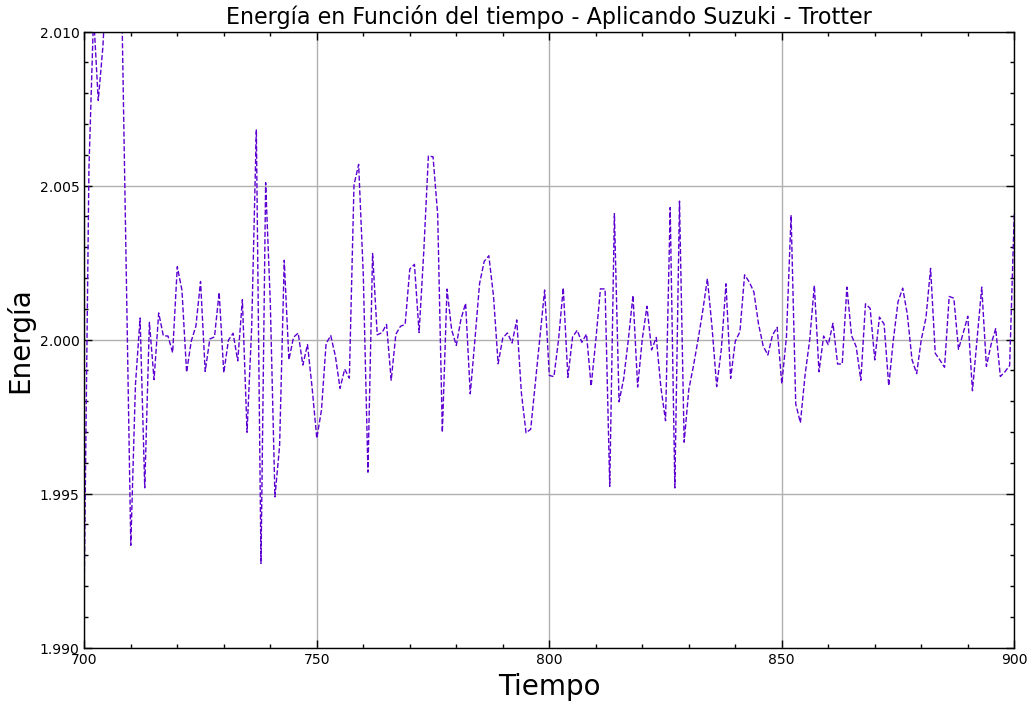

In [4]:
#Parametros simulación
t_i=0
t_f=900
dt=0.001
pasos_0 = (t_f-t_i)/dt
pasos = int(pasos_0)


#Inicialización de variables.

px = []
py = []
qx = []
qy = []
t = []
E = []


#Condiciones Inciales.

p_x_0 = 0
p_y_0 = 0

q_x_0 = 2
q_y_0 = 1

#Agregamos las condiciones iniciales a la lista inicializada.
px.append(p_x_0)
py.append(p_y_0)
qx.append(q_x_0)
qy.append(q_y_0)
t.append(t_i)
E.append(2)

#Creamos vectores p y x generales (se iteraran.)
p = np.array([p_x_0,p_y_0])
q = np.array([q_x_0,q_y_0])

#Suzuki-Trotter.
for i in range(0,pasos):
    #Generamos la lista de tiempo.
    t_i = t_i + dt
    t.append(t_i)
    #Iteramos
    p1 = p[0] - dt * q[0]*q[1]**2
    p2 = p[1] - dt * q[1]*q[0]**2
    q1 = dt*p[0] - dt**2 * q[0] * q[1]**2 + q[0]
    q2 = dt*p[1] - dt**2 * q[1] * q[0]**2 + q[1]
    E_1 = (1/2) * (p1**2 + p2**2) + (1/2) * q1**2 * q2**2
    E.append(E_1)
    
    #Guardamos los valores
    px.append(p1)
    py.append(p2)
    qx.append(q1)
    qy.append(q2)
    #Redefinimos los nuevos valores
    q = np.array([q1,q2])
    p = np.array([p1,p2])

#Obtener los rangos que solo quiero mostrar en la grafica:
x = t[::1000]
y = E[::1000]
#Graficas:
plt.figure(figsize=(12, 8))
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.plot(x, y, color='#5b00d1', linestyle='--', linewidth=1)
plt.ylim(1.99, 2.01)
plt.yticks(np.arange(1.99, 2.012, 0.005))
plt.xlim(700, 900)
plt.xticks(np.arange(700, 920, 50))
plt.xticks(fontsize=10)  # Tamaño de fuente para los ticks del eje x
plt.yticks(fontsize=10)
plt.xlabel(r'Tiempo',fontsize=20)
plt.ylabel(r'Energía',fontsize=20)
plt.title(r'Energía en Función del tiempo - Aplicando Suzuki - Trotter')
#plt.legend(loc='upper right')
plt.grid(True)
plt.savefig("Grafica_5.png", dpi=500)
plt.show()

<a id="2.3"></a>
## 2.3 - Solución Perturbativa - Energía.

Solucionamos el sistema con la siguiente aproximación:
$$
\hat{v}(t+\Delta t)=\hat{1}+\Delta t(K+v)
$$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#Si se genera problemas al compilar, comente las siguientes lineas:
plt.style.reload_library()
plt.style.use(['science','notebook'])
from itertools import combinations
print('done')

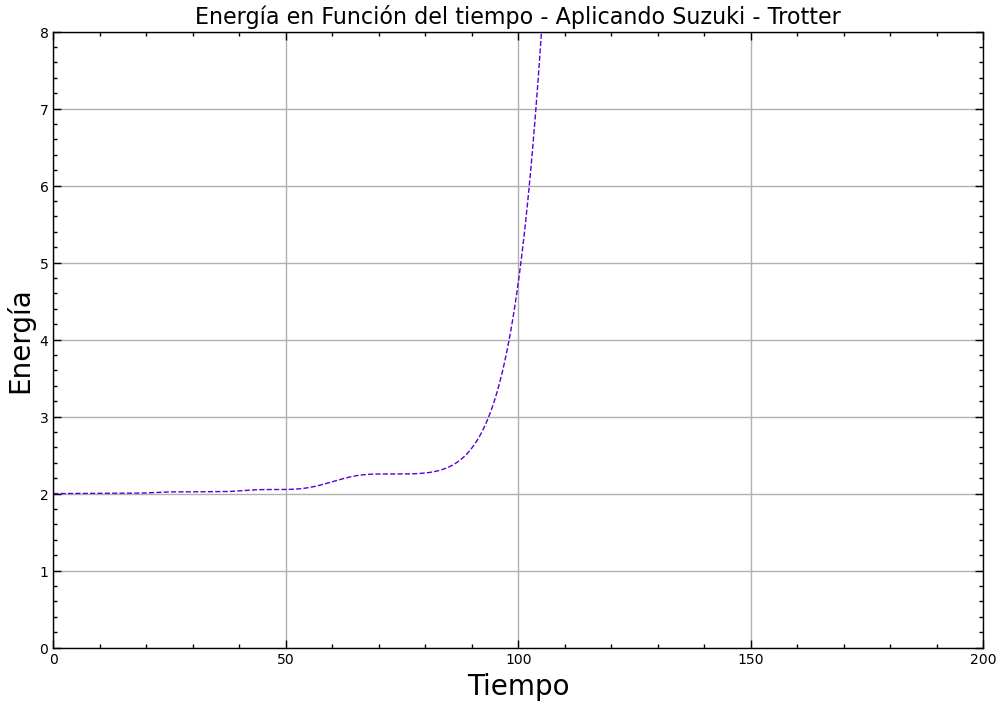

In [6]:
#Parametros simulación
t_i=0
t_f=200
dt=0.00005
pasos_0 = (t_f-t_i)/dt
pasos = int(pasos_0)


#Inicialización de variables.

px = []
py = []
qx = []
qy = []
t = []
E = []

#Condiciones Inciales.

p_x_0 = 0
p_y_0 = 0

q_x_0 = 2
q_y_0 = 1

#Agregamos las condiciones iniciales a la lista inicializada.
px.append(p_x_0)
py.append(p_y_0)
qx.append(q_x_0)
qy.append(q_y_0)
t.append(t_i)
E.append(2)

#Creamos vectores p y x generales (se iteraran.)
p = np.array([p_x_0,p_y_0])
q = np.array([q_x_0,q_y_0])

#Perturbacion.
for i in range(0,pasos):
    #Generamos la lista de tiempo.
    t_i = t_i + dt
    t.append(t_i)
    #Iteramos
    p1 = p[0] - dt * q[0]*q[1]**2
    p2 = p[1] - dt * q[1]*q[0]**2
    q1 = dt*p[0] + q[0]
    q2 = dt*p[1] + q[1]
    E_1 = (1/2) * (p1**2 + p2**2) + (1/2) * (q1**2 * q2**2)
    E.append(E_1)
    
    #Guardamos los valores
    px.append(p1)
    py.append(p2)
    qx.append(q1)
    qy.append(q2)
    #Redefinimos los nuevos valores
    q = np.array([q1,q2])
    p = np.array([p1,p2])

#Obtener los rangos que solo quiero mostrar en la grafica:
x = t[::1000]
y = E[::1000]
#Graficas:
plt.figure(figsize=(12, 8))
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
#plt.plot(qx,qy,linewidth=1, label="Susuki-Trotter")
plt.plot(x, y, color='#5b00d1', linestyle='--', linewidth=1)
plt.ylim(0, 8)
plt.yticks(np.arange(0, 8.2, 1))
plt.xlim(0, 200)
plt.xticks(np.arange(0, 220, 50))

plt.xticks(fontsize=10)  # Tamaño de fuente para los ticks del eje x
plt.yticks(fontsize=10)
plt.xlabel(r'Tiempo',fontsize=20)
plt.ylabel(r'Energía',fontsize=20)
plt.title(r'Energía en Función del tiempo - Aplicando Suzuki - Trotter')
#plt.legend(loc='upper right')
plt.grid(True)
plt.savefig("Grafica_6.png", dpi=500)
plt.show()